# Introduction to R for amplicon analysis

**R** is a free software environment for statistical computing and graphics. It compiles and runs on a wide variety of UNIX platforms, Windows and MacOS.

A cheat sheet pdf can be found here:

https://cran.r-project.org/doc/contrib/Short-refcard.pdf


Popular alternatives to run bioninformatics pipelines are:

* Python
* Bash
* Perl
* Java



### Integrated Development Environment (IDE)
In this workshop all the code will be run using RStudio. However, R scripts can be run using the R console, R Noterbooks, Jupyter Notebooks or other IDEs.

## The basics

In this section wil will learn the basics of R.


### Assignment Operators
Assign a value to a variable. The operators <- and = assign into the environment in which they are evaluated. Consider these two equivalent:

In [100]:
a = 3
print(a)
b <- 3
print(b)

[1] 3
[1] 3


### Data types
All the variables have a specified data type, some of them are:

* Numeric
* Integer
* Logical
* Character
* Vectors
* Matrices

The function class() will help us to identify the type assigned

In [101]:
v <- 3.5  # numeric
v <- 3L   # integer
v <- TRUE # logical
v <- "Hi" # Character

In [102]:
print(v)
print(class(v))

[1] "Hi"
[1] "character"


### Vectors
One dimensional array

In [103]:
v <- c(3,4,5,6)                          #numeric vector
v <- c("one","two","three")              #character vector
v <- c(TRUE,TRUE,TRUE,FALSE,TRUE,FALSE)  #logical vector

Manipulate vectors

In [104]:
v <- c("one","two","three") 
print(v[1])                               # Printing the first element of the vector
print(v[1:2])                             # Printing elements from 1 to 2

[1] "one"
[1] "one" "two"


### Matrices
Two dimensional array

In [105]:
M <- matrix(1:20, nrow=5,ncol=4)
print(M)

     [,1] [,2] [,3] [,4]
[1,]    1    6   11   16
[2,]    2    7   12   17
[3,]    3    8   13   18
[4,]    4    9   14   19
[5,]    5   10   15   20


In [106]:
M[1:3,1:2]       # Matrix subset
M[,4]            # 4th column of matrix
M[3,]            # 3rd row of matrix

1,6
2,7
3,8


[1] 16 17 18 19 20

[1]  3  8 13 18

### Loops
A loop describes the process of repeating the same instructions or processes the same information over and over until receiving the order to stop. Two useful type of loops are: for and while.

In [107]:
c <- 1
while (c < 3){
    print(paste("c is still less than 3, c=",c))
    c <- c + 1
}

[1] "c is still less than 3, c= 1"
[1] "c is still less than 3, c= 2"


In [108]:
for (c in 1:5) {
    print(paste("c=",c))
}

[1] "c= 1"
[1] "c= 2"
[1] "c= 3"
[1] "c= 4"
[1] "c= 5"


### Conditional Statements

In [109]:
hour <- as.numeric(format(Sys.time(), "%H"))

if (hour < 12) {
    print("Selamat Pagi")
} else if (hour < 15){
    print("Selamat tengah hari")
} else if (hour < 22 ){
   print("Selamat petang")
} else {
     print("Selamat malam")
}

[1] "Selamat petang"


### Functions
A function is a block of organized, reusable code that is used to perform a single, related action. A typical function in R will have:

* Name
* Parameters
* Local Variable declarations (Optional)
* Statements
* Return Statement (Optional)

Example: function to calculate the Euclidean distance between two points

In [110]:
euc_distance <- function(a,b){
    d <- sqrt( (a[1]-b[1])^2 + (a[2]-b[2])^2 )
    return(d)
}

In [111]:
D <- euc_distance(c(1,1),c(2,2)) # D <- euc_distance(a=c(1,1),b=c(2,2))
D

[1] 1.414214

## Setting up the environment

In [112]:
# Install new packages
install.packages("ggplot2", update = TRUE, ask=FALSE) 

Warning message:
"package 'ggplot2' is in use and will not be installed"

In [113]:
# Load the library
library(ggplot2)

In [114]:
# Setting the working directory to the currect directory
setwd <-  getwd()
setwd

[1] "C:/Users/SA04PA/Documents/repos/github/bioinformatics-workshop-2020"

## Executing an R script
A script can be executed directly from the R console. Just remember to use the "/" or "\\" symbol to specify the path of your file:

In [115]:
source("C:/Users/SA04PA/Documents/repos/github/bioinformatics-workshop-2020/script_example.R")
source("C:\\Users\\SA04PA\\Documents\\repos/github/bioinformatics-workshop-2020/script_example.R")

[1] "Selamat siang!"
[1] "Welcome to our Introduction to R session"
[1] "Selamat siang!"
[1] "Welcome to our Introduction to R session"


# Data Analysis using R
Data analysis is a process of inspecting, cleansing, transforming and modeling data with the goal of discovering useful information, informing conclusion and supporting decision-making.

## Data frames
Data frame is a two dimensional data structure. A data frame accepts different data types (numeric, character, logical, etc.)

In [116]:
number = c(2, 3, 5) 
name = c("dos", "tres", "cinco") 
pair = c(TRUE, FALSE, FALSE) 
df = data.frame(number, name, pair)       # df is a data frame
df

number,name,pair
2,dos,TRUE
3,tres,FALSE
5,cinco,FALSE


The ggplots2 library provides some sample data frames to create plots, like mpg:

In [117]:
head(mpg,4) # List the first 4 rows of the mpg data frame

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


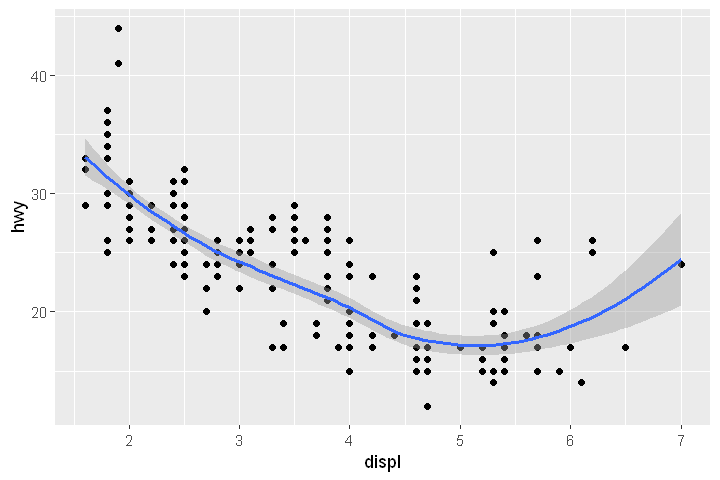

In [118]:
options(repr.plot.width=6, repr.plot.height=4)
base <- ggplot(mpg, aes(displ, hwy)) + geom_point()
base + geom_smooth()